# EDA y Preprocesamiento del Conjunto de Datos de Control de Calidad

Este cuaderno realiza Análisis Exploratorio de Datos (EDA) y preprocesamiento en el conjunto de datos 'dataset.csv', que contiene resultados de pruebas de control de calidad para lotes de productos en 2025.

## Importar Librerías

Importar las librerías necesarias para manipulación de datos, visualización y preprocesamiento.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Establecer estilo para gráficos
sns.set(style='whitegrid')

## Cargar Conjunto de Datos

Cargar el conjunto de datos usando pandas y mostrar las primeras filas para entender la estructura.

In [3]:
# Cargar el conjunto de datos
df = pd.read_csv('dataset.csv')

# Mostrar las primeras 5 filas
print("Primeras 5 filas del conjunto de datos:")
df.head()

Primeras 5 filas del conjunto de datos:


,ItemID,LotNumber,manufacturedDate,THICK-MIN,THICK-AVG,THICK-LEFT-EDGE,THICK-RIGHT-EDGE,ASPERITYBOT,ASPERITYTOP,CARBONMEM,...,TDYIELONG,MDTBSTR,TDTBSTR,MDTYISTR,TDTYISTR,TEARMD,TEARTD,MELTFLOWMEM,OIT,PINPUNCTURE
0,FG-HDMSDS060BBBEG,GTF0146200059,2025-01-06 16:47:41,58.5,61.79,59.9,63.9,29,28,2.1,...,17,182,186,140,144,58.0,57.0,0.21,171.0,130.0
1,FG-HDMSDS060BBBEG,GTF0145530054,2025-01-06 19:01:47,55.9,58.47,63.9,64.6,30,40,2.5,...,16,205,184,147,142,53.0,47.0,0.19,145.0,136.0
2,FG-HDMSDS060BBBEG,GTF0145530055,2025-01-06 20:39:49,56.0,59.45,63.6,64.3,33,31,2.5,...,16,205,184,147,142,53.0,47.0,0.19,145.0,136.0
3,FG-HDMSDS060BBBEG,GTC0146650005,2025-01-06 21:25:41,54.6,57.65,60.6,54.3,30,37,2.1,...,17,209,212,142,155,59.0,56.0,0.21,145.0,139.0
4,FG-HDMSDS060BBBEG,GTF0145530056,2025-01-06 22:29:33,56.2,58.85,61.2,64.4,32,35,2.5,...,16,205,184,147,142,53.0,47.0,0.19,145.0,136.0


## Análisis Exploratorio de Datos (EDA)

Realizar EDA para entender los datos: estadísticas resumidas, tipos de datos, valores faltantes, distribuciones y correlaciones.

### Estadísticas Resumidas y Tipos de Datos

Obtener una visión general de las estadísticas y tipos de datos del conjunto de datos.

In [4]:
# Estadísticas resumidas para columnas numéricas
print("Estadísticas resumidas:")
df.describe()

# Tipos de datos
print("\nData types:")
df.dtypes

# Información
print("\nDataset info:")
df.info()

Estadísticas resumidas:

Data types:

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ItemID            6114 non-null   object 
 1   LotNumber         6114 non-null   object 
 2   manufacturedDate  6114 non-null   object 
 3   THICK-MIN         6114 non-null   float64
 4   THICK-AVG         6114 non-null   float64
 5   THICK-LEFT-EDGE   6114 non-null   float64
 6   THICK-RIGHT-EDGE  6114 non-null   float64
 7   ASPERITYBOT       6114 non-null   int64  
 8   ASPERITYTOP       6114 non-null   int64  
 9   CARBONMEM         6114 non-null   float64
 10  DENSITY           6114 non-null   float64
 11  MDTBELONG         6114 non-null   int64  
 12  TDTBELONG         6114 non-null   int64  
 13  MDYIELONG         6114 non-null   int64  
 14  TDYIELONG         6114 non-null   int64  
 15  MDTBSTR           6114 non-null   int

### Valores Faltantes

Verificar valores faltantes en el conjunto de datos.

In [5]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
df.isnull().sum()

Valores faltantes por columna:


ItemID               0
LotNumber            0
manufacturedDate     0
THICK-MIN            0
THICK-AVG            0
THICK-LEFT-EDGE      0
THICK-RIGHT-EDGE     0
ASPERITYBOT          0
ASPERITYTOP          0
CARBONMEM            0
DENSITY              0
MDTBELONG            0
TDTBELONG            0
MDYIELONG            0
TDYIELONG            0
MDTBSTR              0
TDTBSTR              0
MDTYISTR             0
TDTYISTR             0
TEARMD               1
TEARTD               1
MELTFLOWMEM          0
OIT                 11
PINPUNCTURE          3
dtype: int64

### Distribuciones

Visualizar distribuciones de variables numéricas usando histogramas y diagramas de caja.

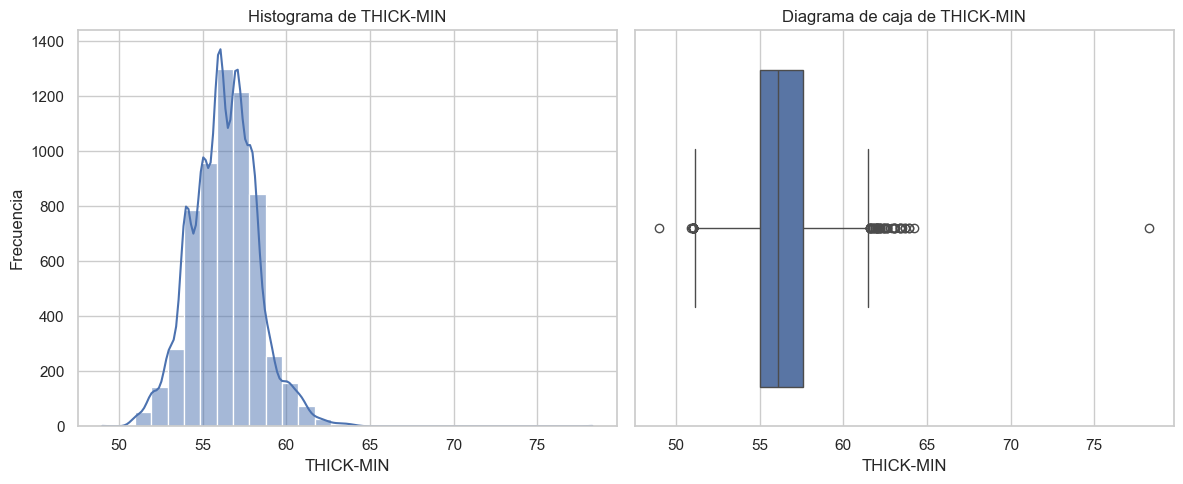

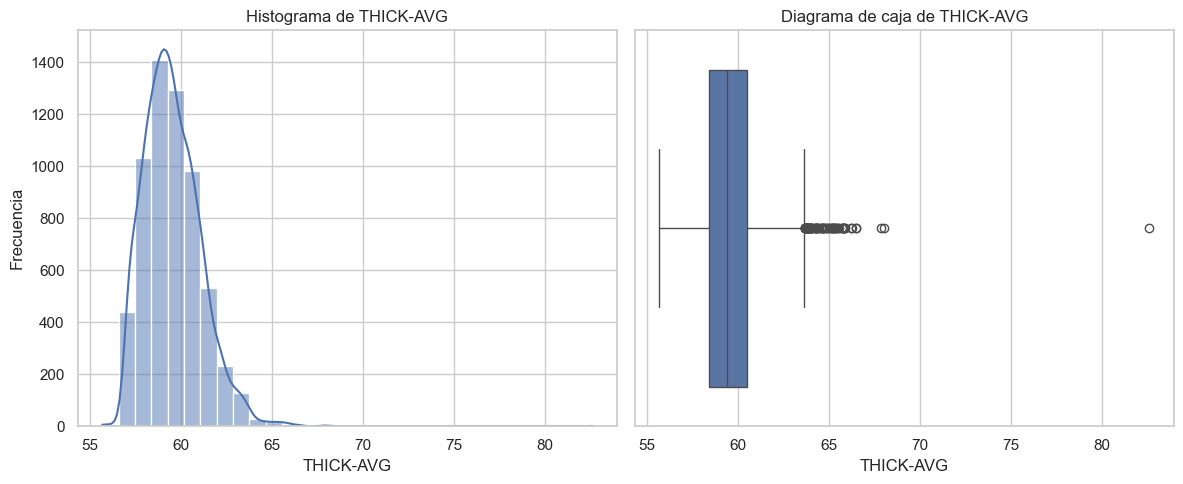

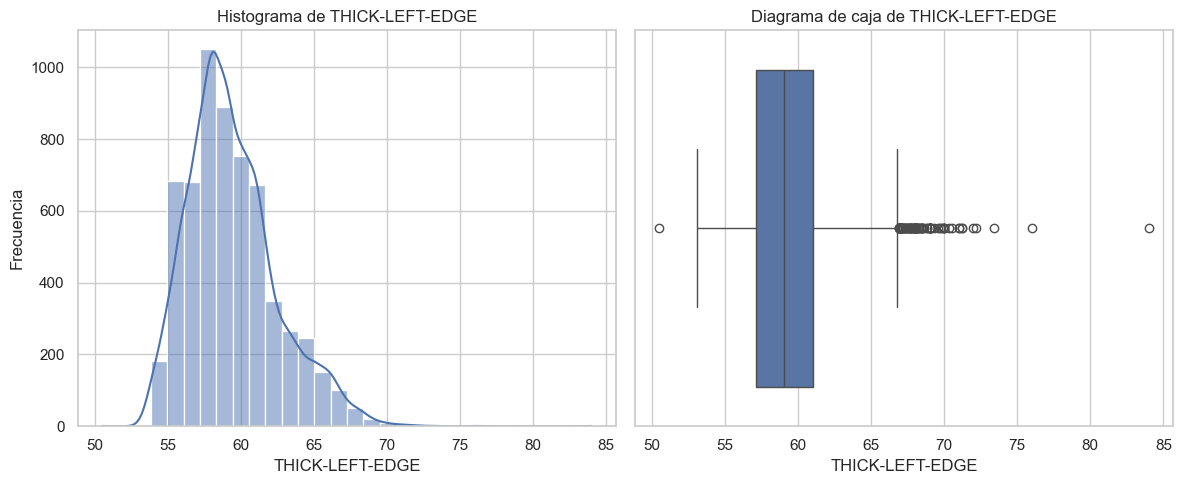

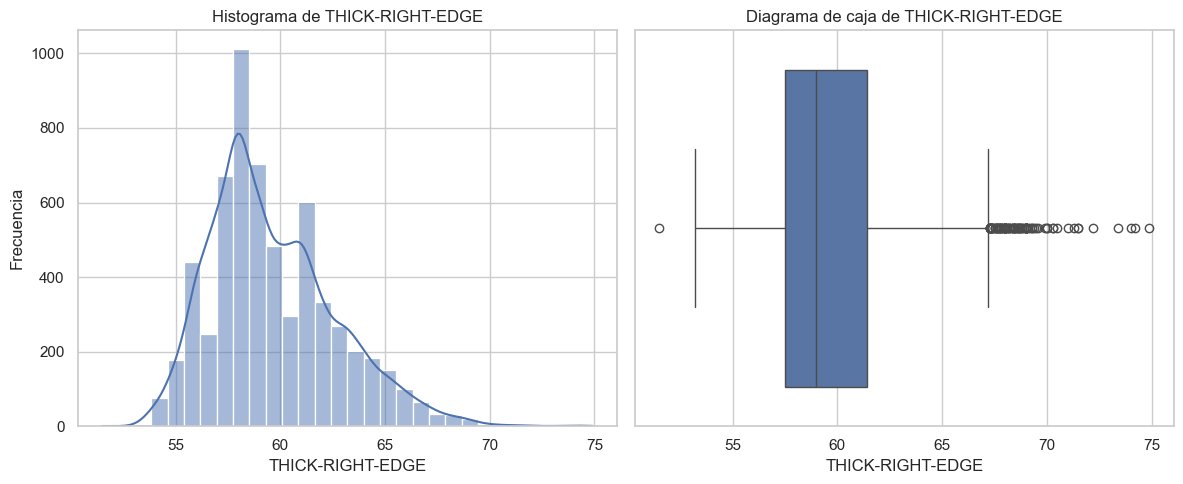

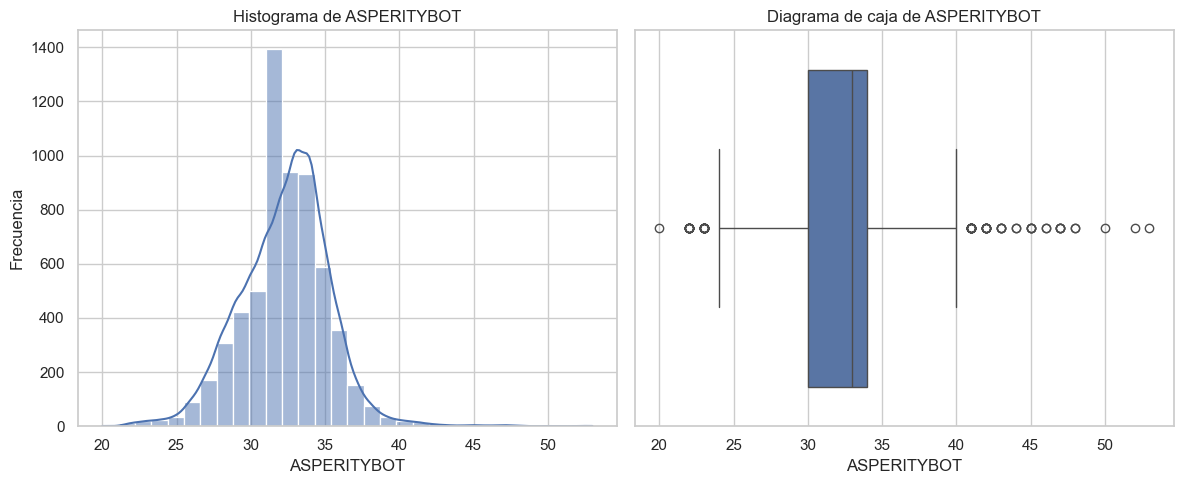

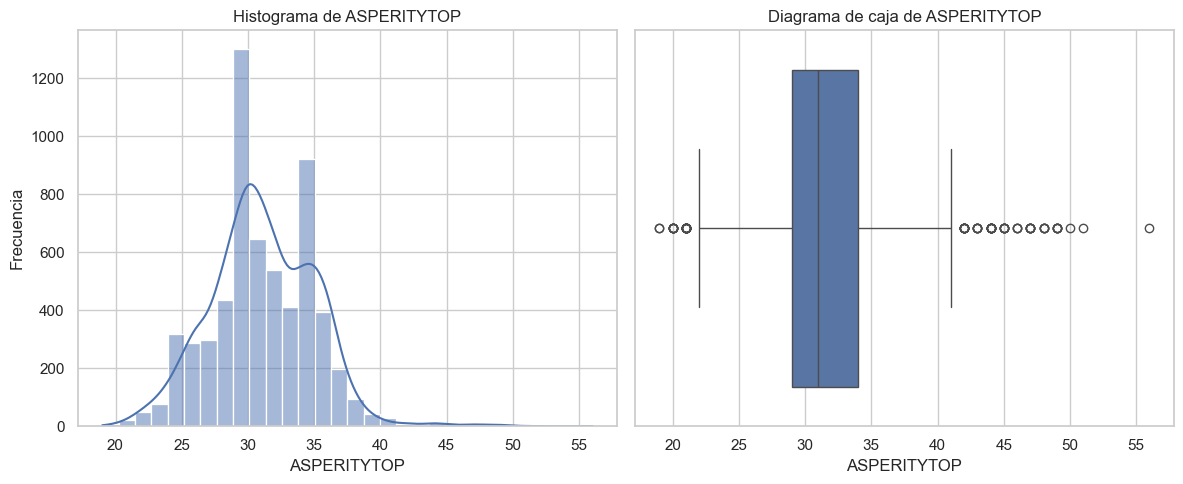

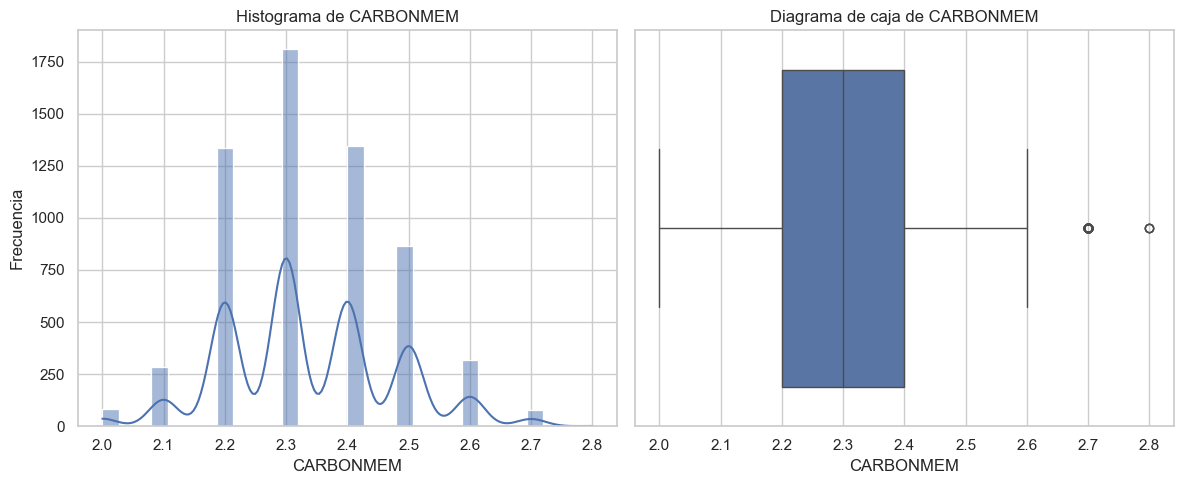

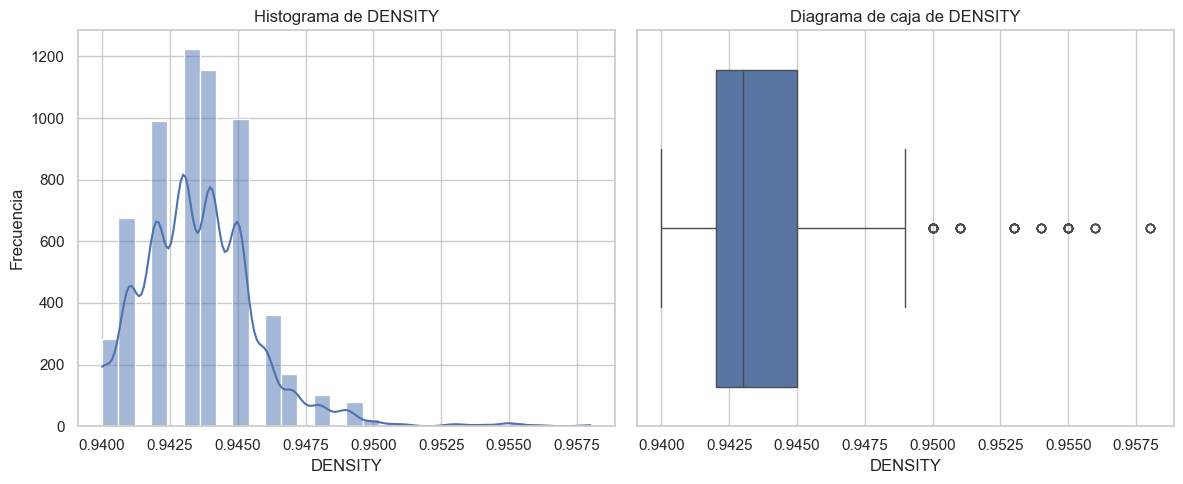

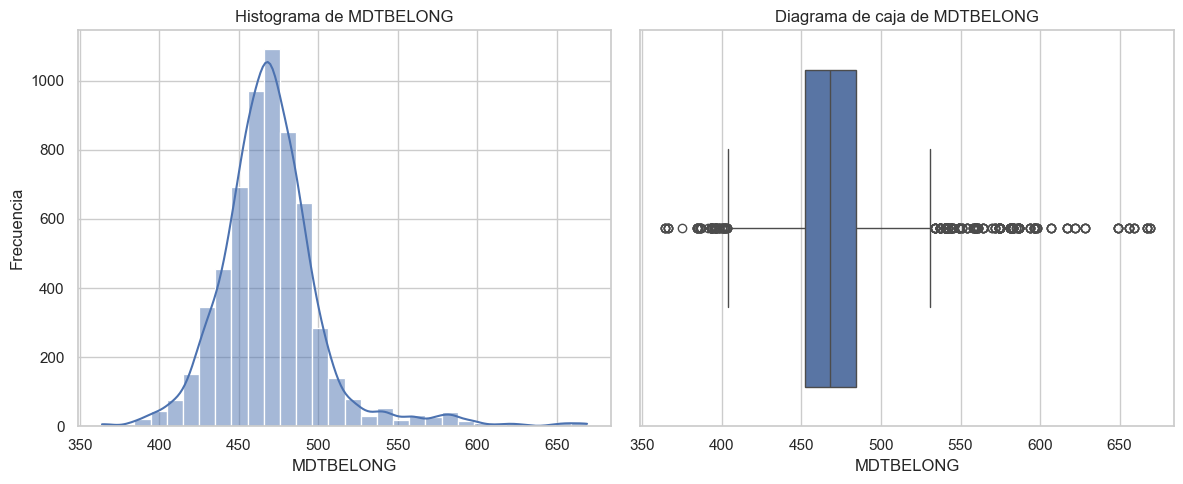

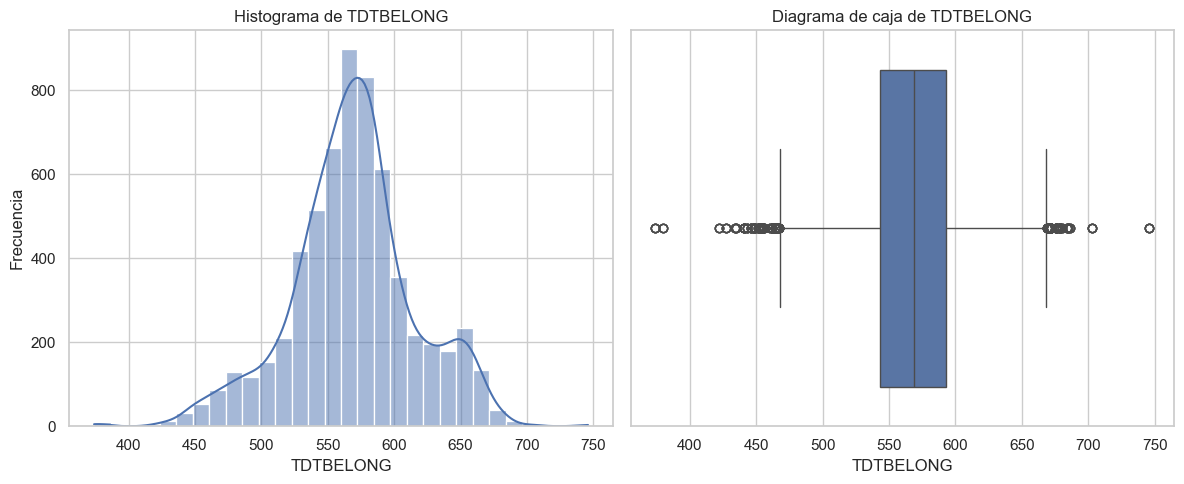

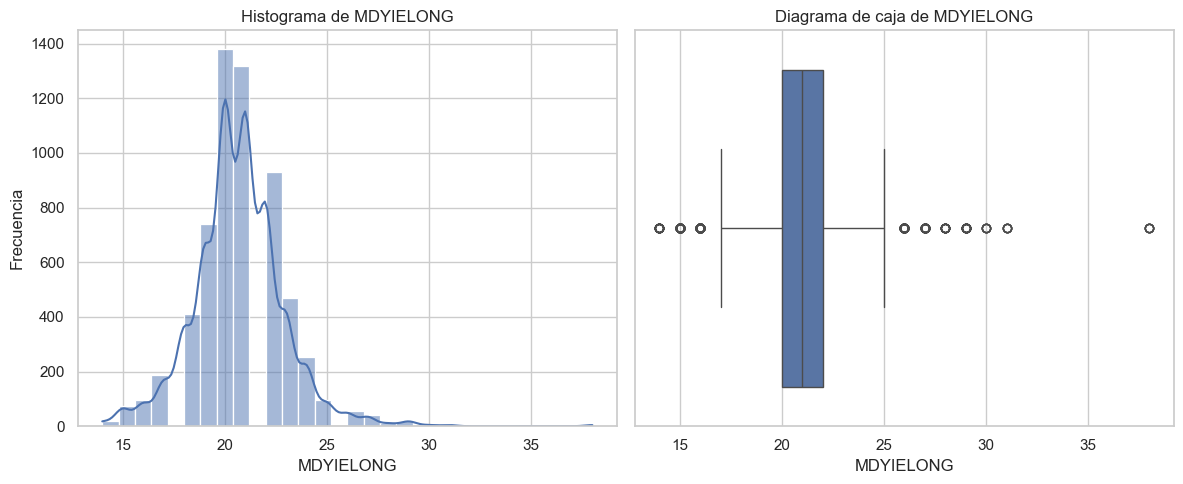

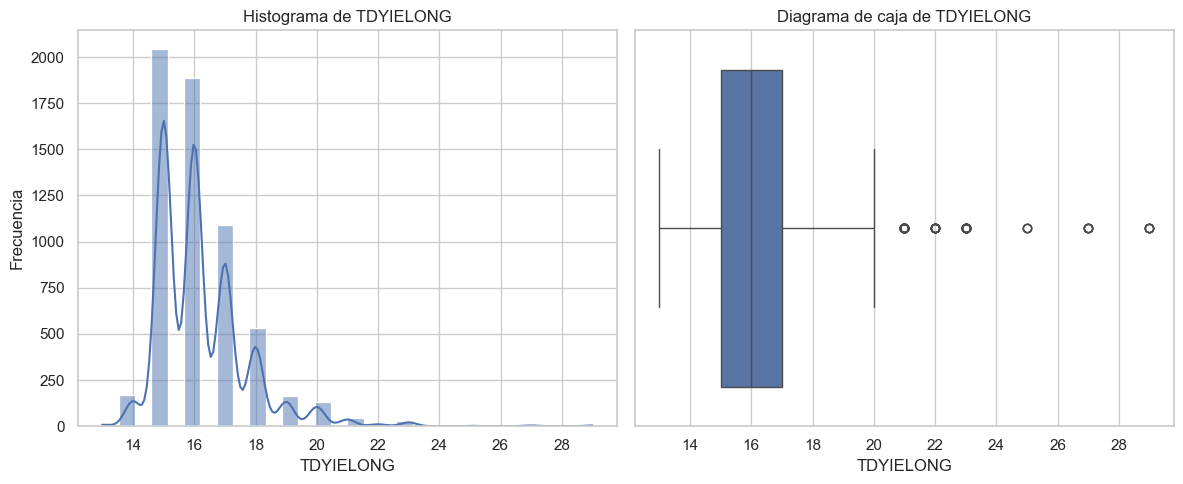

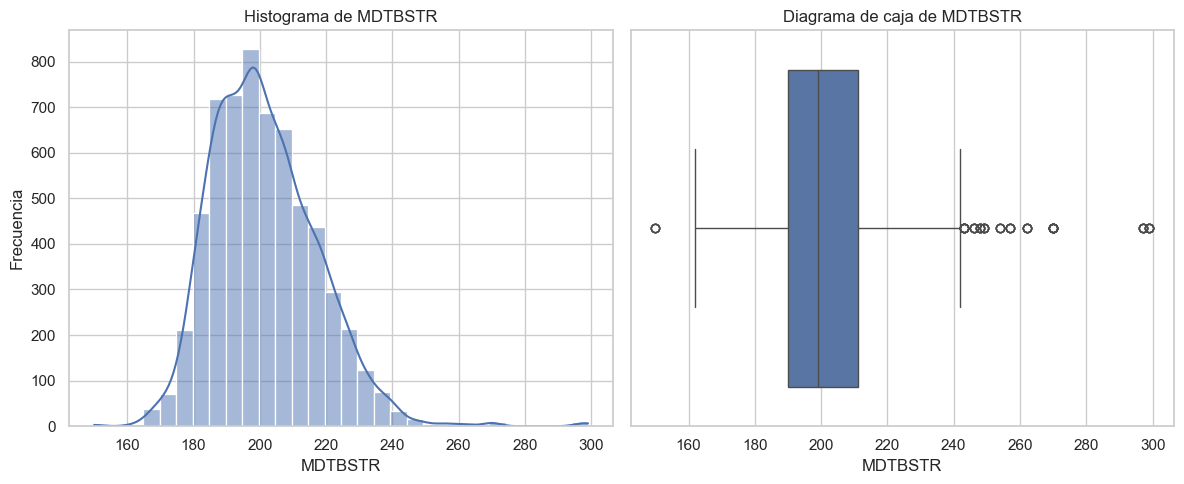

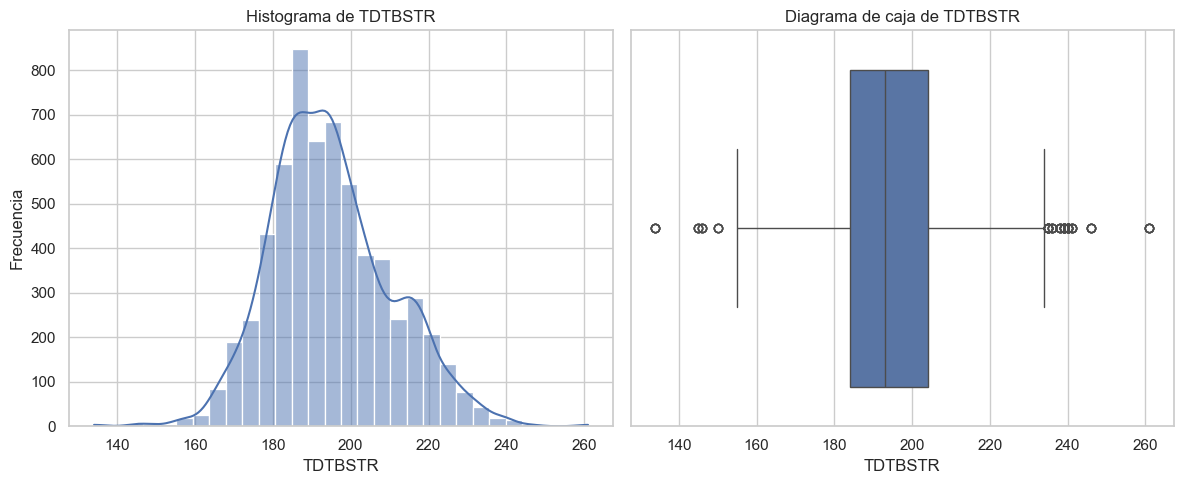

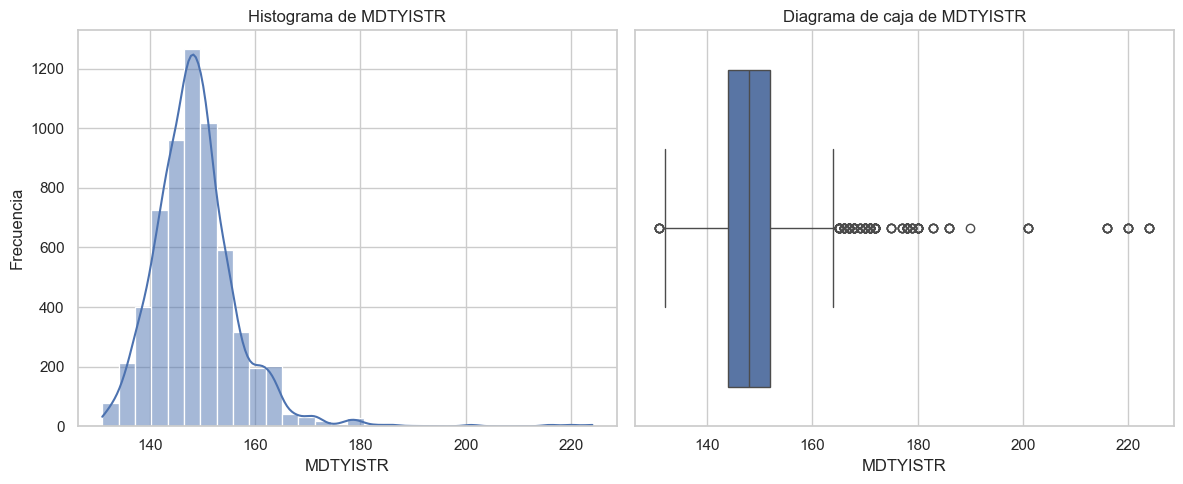

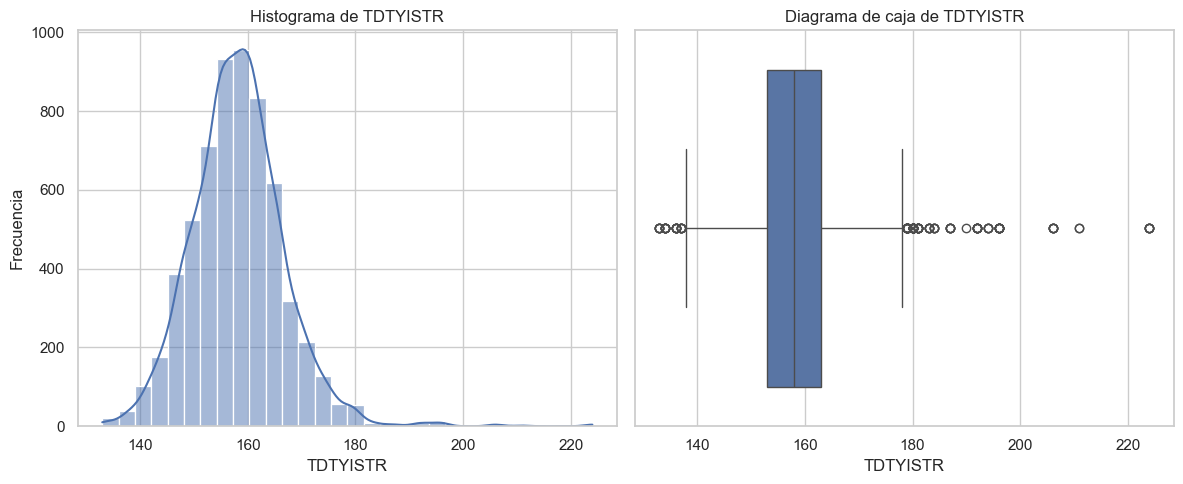

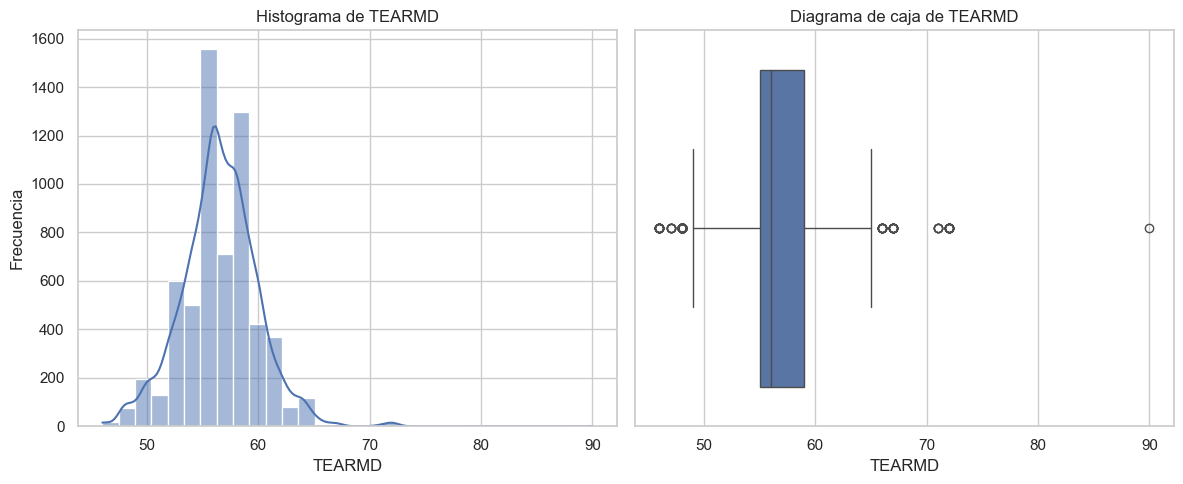

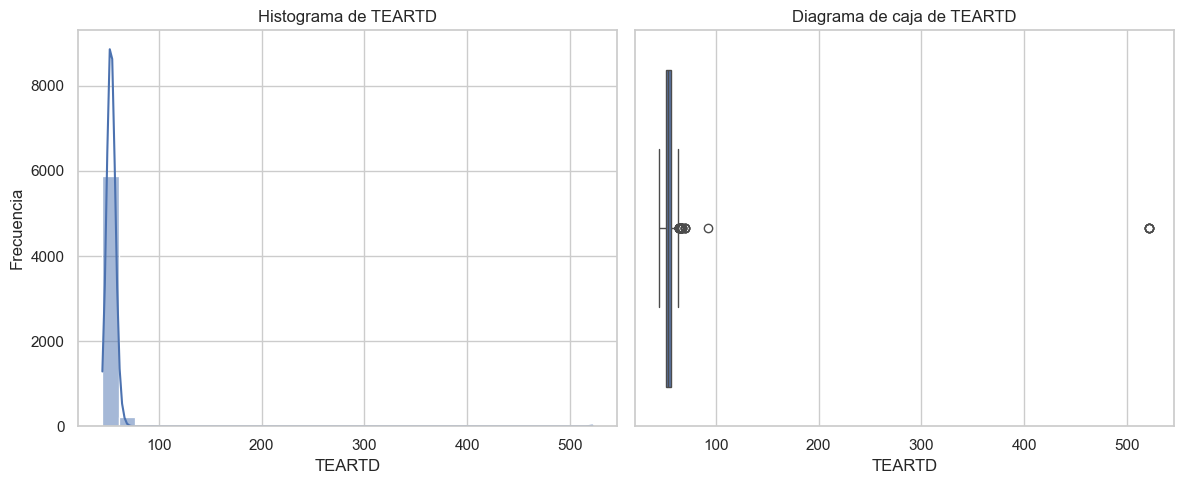

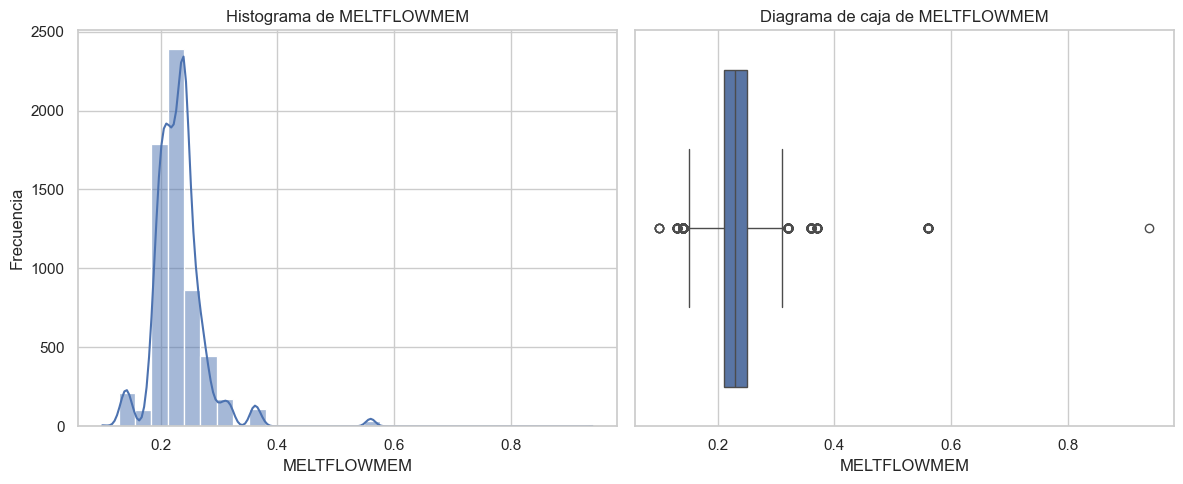

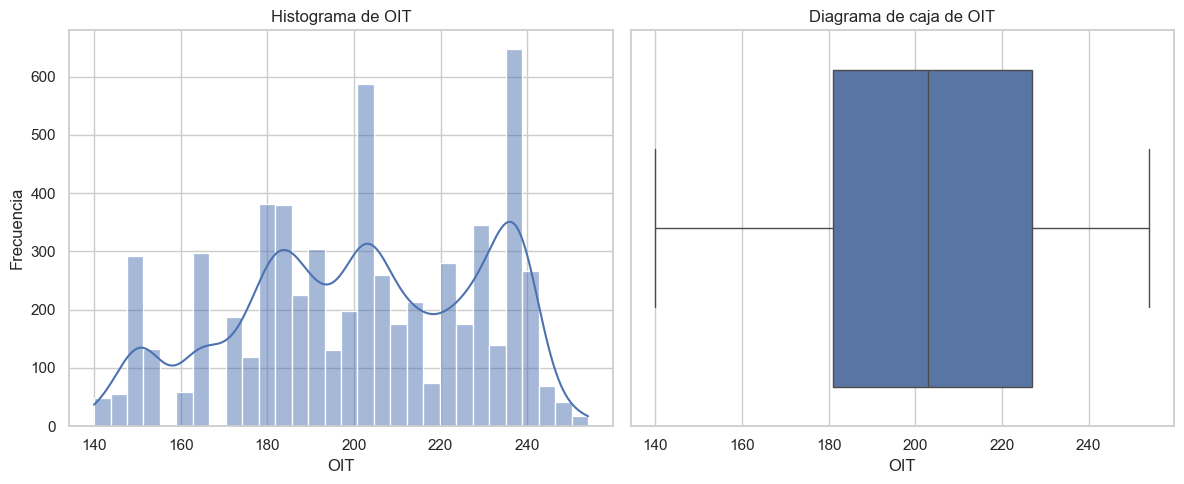

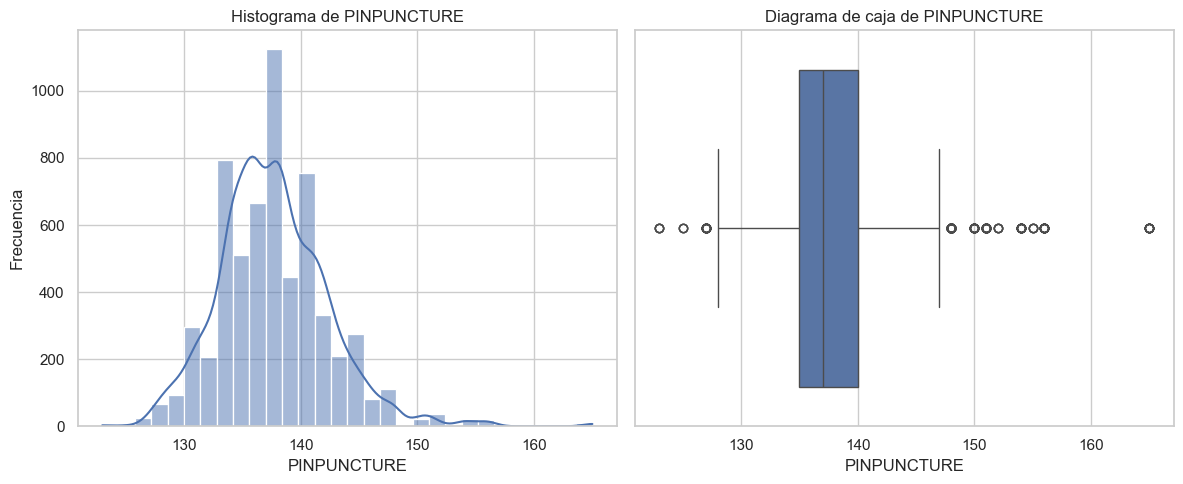

In [6]:
# Identificar columnas numéricas
numerical_cols = [col for col in df.columns if col not in ['ItemID', 'LotNumber', 'manufacturedDate']]

# Graficar histogramas y diagramas de caja para cada columna numérica
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Diagrama de caja de {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

### Correlaciones

Analizar correlaciones entre variables numéricas usando un mapa de calor.

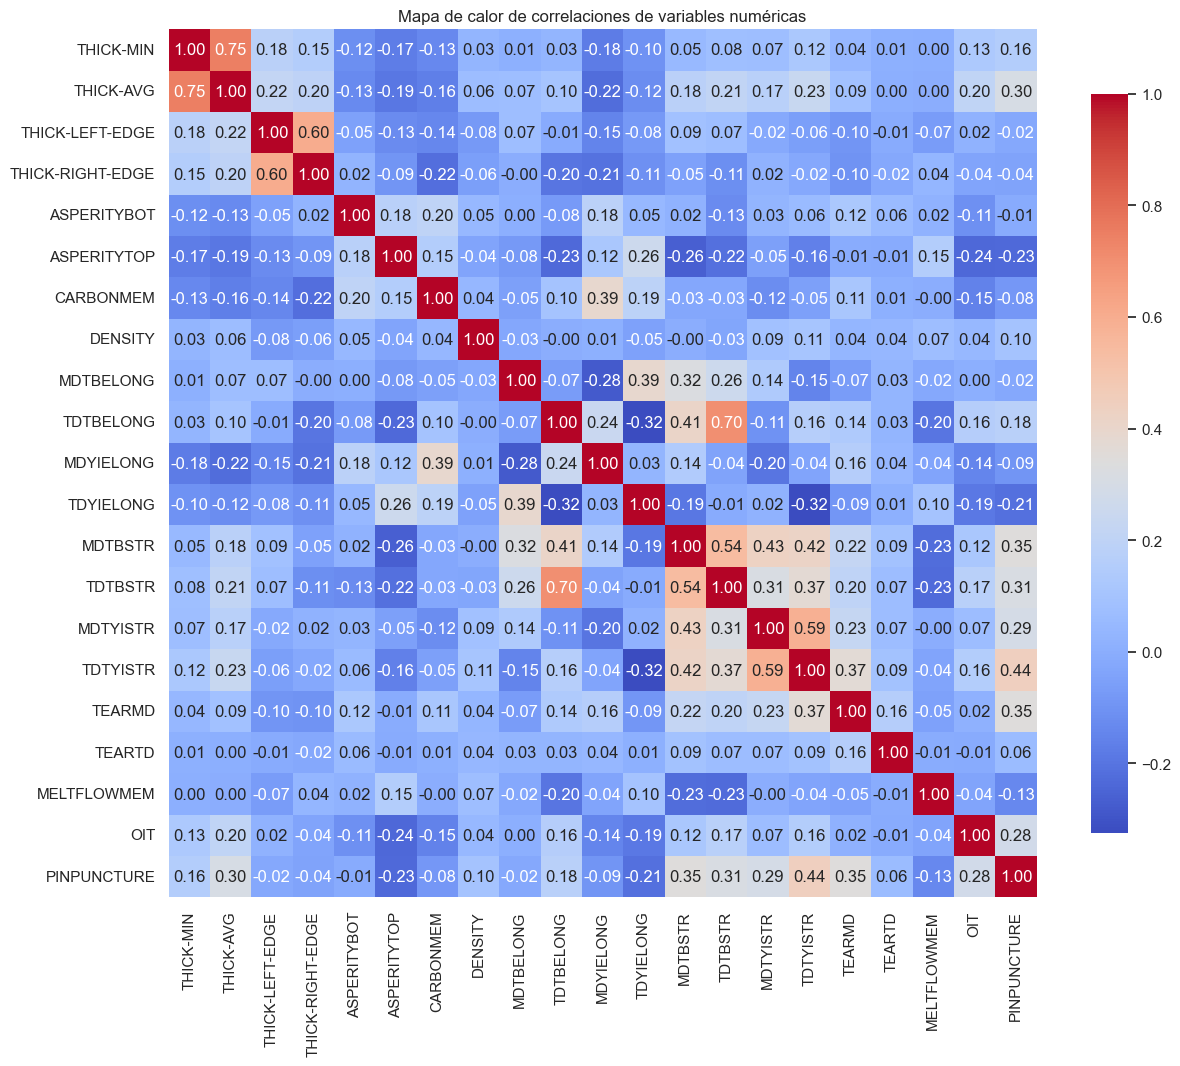

In [7]:
# Calcular matriz de correlación
corr = df[numerical_cols].corr()

# Graficar mapa de calor
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
plt.title('Mapa de calor de correlaciones de variables numéricas')
plt.show()

## Limpieza de Datos

Limpiar los datos: manejar valores faltantes, detectar y manejar valores atípicos, asegurar tipos de datos apropiados.

### Manejar Valores Faltantes

Imputar valores faltantes en columnas numéricas con la media (asumiendo que no hay valores faltantes basados en la verificación, pero el código está preparado).

In [8]:
# Imputar valores faltantes con la media para columnas numéricas
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Verificar que no queden valores faltantes
print("Valores faltantes después de la imputación:")
df.isnull().sum()

Valores faltantes después de la imputación:


ItemID              0
LotNumber           0
manufacturedDate    0
THICK-MIN           0
THICK-AVG           0
THICK-LEFT-EDGE     0
THICK-RIGHT-EDGE    0
ASPERITYBOT         0
ASPERITYTOP         0
CARBONMEM           0
DENSITY             0
MDTBELONG           0
TDTBELONG           0
MDYIELONG           0
TDYIELONG           0
MDTBSTR             0
TDTBSTR             0
MDTYISTR            0
TDTYISTR            0
TEARMD              0
TEARTD              0
MELTFLOWMEM         0
OIT                 0
PINPUNCTURE         0
dtype: int64

### Detectar y Manejar Valores Atípicos (Método IQR)

Eliminar valores atípicos usando el método IQR para cada columna numérica.

In [9]:
# Función para eliminar valores atípicos usando IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Eliminar valores atípicos
df_clean = remove_outliers_iqr(df, numerical_cols)

print(f"Forma del conjunto de datos original: {df.shape}")
print(f"Forma del conjunto de datos después de la eliminación de valores atípicos: {df_clean.shape}")

Forma del conjunto de datos original: (6114, 24)
Forma del conjunto de datos después de la eliminación de valores atípicos: (3907, 24)


### Asegurar que las Columnas Numéricas Estén Apropiadamente Tipadas

Convertir columnas numéricas a float y analizar fechas.

In [10]:
# Asegurar que las columnas numéricas sean float
df_clean[numerical_cols] = df_clean[numerical_cols].astype(float)

# Convertir manufacturedDate a datetime
df_clean['manufacturedDate'] = pd.to_datetime(df_clean['manufacturedDate'])

# Verificar tipos de datos
print("Tipos de datos después de la limpieza:")
df_clean.dtypes

Tipos de datos después de la limpieza:


ItemID                      object
LotNumber                   object
manufacturedDate    datetime64[ns]
THICK-MIN                  float64
THICK-AVG                  float64
THICK-LEFT-EDGE            float64
THICK-RIGHT-EDGE           float64
ASPERITYBOT                float64
ASPERITYTOP                float64
CARBONMEM                  float64
DENSITY                    float64
MDTBELONG                  float64
TDTBELONG                  float64
MDYIELONG                  float64
TDYIELONG                  float64
MDTBSTR                    float64
TDTBSTR                    float64
MDTYISTR                   float64
TDTYISTR                   float64
TEARMD                     float64
TEARTD                     float64
MELTFLOWMEM                float64
OIT                        float64
PINPUNCTURE                float64
dtype: object

## Preprocesamiento

Normalizar o estandarizar las características numéricas.

### Estandarizar Características Numéricas

Usar StandardScaler para estandarizar las características numéricas.

In [11]:
# Inicializar StandardScaler
scaler = StandardScaler()

# Crear una copia para datos escalados
df_scaled = df_clean.copy()

# Ajustar y transformar columnas numéricas
df_scaled[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# Mostrar resumen de datos escalados
print("Estadísticas resumidas después del escalado:")
df_scaled[numerical_cols].describe()

Estadísticas resumidas después del escalado:


,THICK-MIN,THICK-AVG,THICK-LEFT-EDGE,THICK-RIGHT-EDGE,ASPERITYBOT,ASPERITYTOP,CARBONMEM,DENSITY,MDTBELONG,TDTBELONG,...,TDYIELONG,MDTBSTR,TDTBSTR,MDTYISTR,TDTYISTR,TEARMD,TEARTD,MELTFLOWMEM,OIT,PINPUNCTURE
count,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03,...,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03,3.907000e+03
mean,-2.571557e-15,-1.149381e-15,-3.855517e-16,-2.102348e-15,-1.105733e-15,1.600403e-16,2.473351e-16,-8.525785e-15,-4.364737e-16,-9.966148e-16,...,-7.274561e-16,-1.891386e-16,-1.003889e-15,7.601916e-16,-3.782772e-16,7.274561e-16,2.327859e-16,1.309421e-16,-2.909824e-16,2.575195e-15
std,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,...,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00
min,-2.848181e+00,-2.689083e+00,-2.211376e+00,-2.330575e+00,-3.126814e+00,-2.500010e+00,-2.660260e+00,-1.894943e+00,-2.551773e+00,-2.528859e+00,...,-1.787541e+00,-2.405033e+00,-2.750954e+00,-2.358205e+00,-2.891342e+00,-2.524909e+00,-2.490760e+00,-1.986615e+00,-2.110135e+00,-2.500085e+00
25%,-6.734977e-01,-7.839016e-01,-7.843004e-01,-7.606714e-01,-5.103090e-01,-5.799657e-01,-3.527852e-01,-8.138181e-01,-6.512526e-01,-6.329699e-01,...,-9.252218e-01,-7.729880e-01,-7.153379e-01,-7.624242e-01,-6.987036e-01,-5.012547e-01,-7.230688e-01,-7.085475e-01,-6.626746e-01,-6.218266e-01
50%,-1.158866e-01,-5.673307e-02,-5.246651e-02,-1.097356e-01,2.372640e-01,-3.138176e-02,-3.527852e-01,-2.732558e-01,5.591797e-02,-4.551139e-02,...,-6.290272e-02,-6.340314e-02,-1.121925e-01,-5.318817e-02,3.217591e-02,-1.639789e-01,-1.338383e-01,1.434978e-01,8.099775e-03,-8.518131e-02
75%,6.647689e-01,7.031581e-01,6.793674e-01,6.560713e-01,6.110505e-01,7.914942e-01,4.163731e-01,8.078687e-01,6.746922e-01,4.885418e-01,...,7.994163e-01,6.461817e-01,6.417393e-01,6.560479e-01,7.630554e-01,5.105727e-01,7.500076e-01,5.695204e-01,9.260016e-01,7.197867e-01
max,2.839452e+00,3.026462e+00,2.874869e+00,2.723750e+00,2.853770e+00,2.711538e+00,1.954690e+00,2.970118e+00,2.796204e+00,2.411133e+00,...,3.386373e+00,2.916853e+00,2.601962e+00,2.429138e+00,2.809518e+00,2.871503e+00,2.812314e+00,2.273611e+00,1.914511e+00,2.598045e+00


### Analizar Correlaciones Después del Preprocesamiento

Re-analizar correlaciones en los datos escalados.

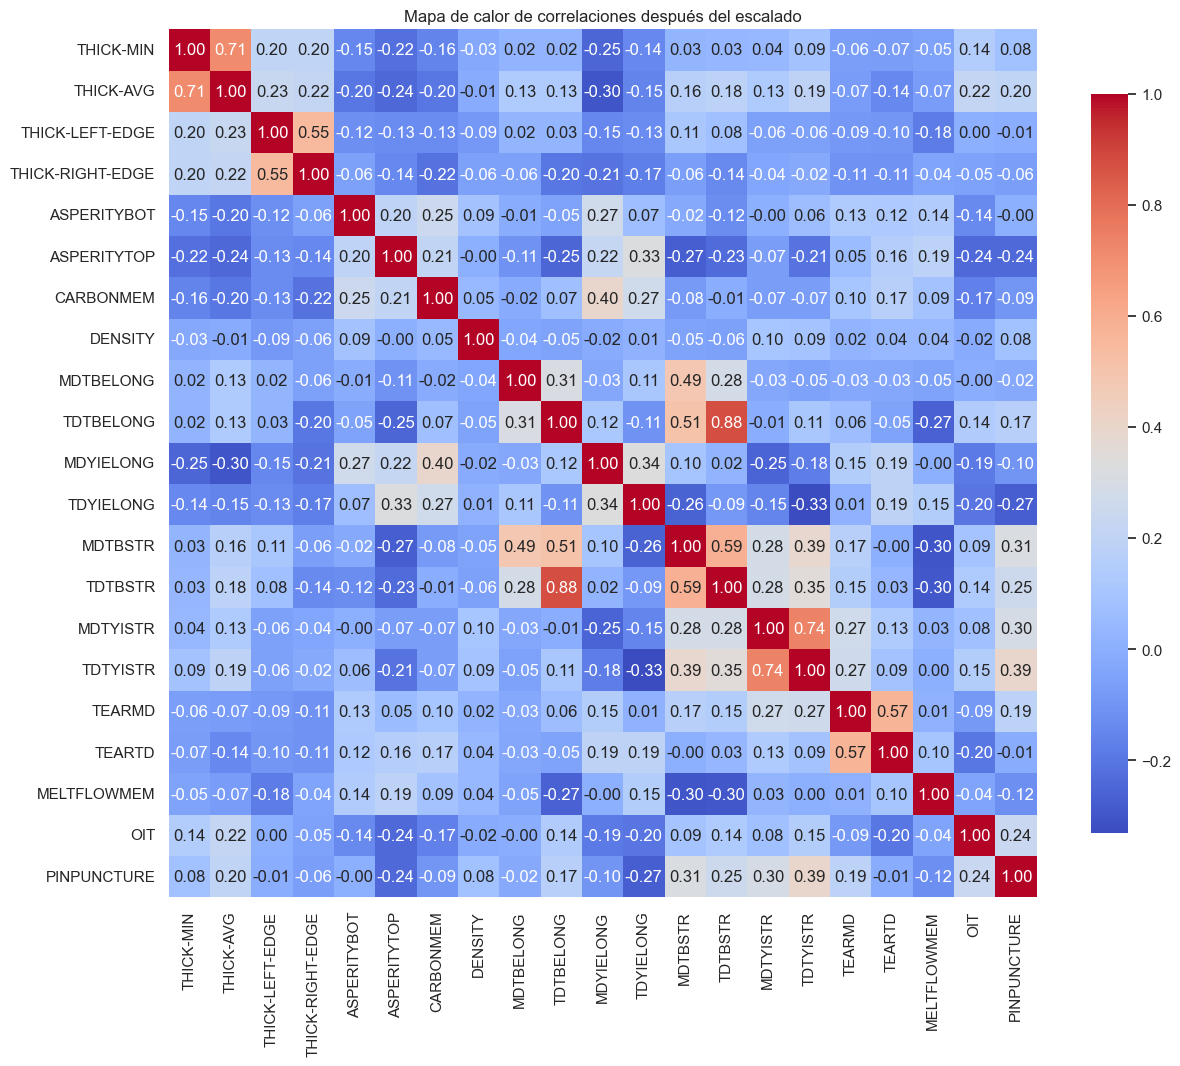

In [12]:
# Calcular matriz de correlación en datos escalados
corr_scaled = df_scaled[numerical_cols].corr()

# Graficar mapa de calor
plt.figure(figsize=(14, 12))
sns.heatmap(corr_scaled, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
plt.title('Mapa de calor de correlaciones después del escalado')
plt.show()

## Guardar Datos Preprocesados

Guardar el conjunto de datos preprocesado para tareas posteriores.

In [13]:
# Guardar los datos preprocesados
df_scaled.to_csv('preprocessed_dataset.csv', index=False)

print("Datos preprocesados guardados como 'preprocessed_dataset.csv'")

Datos preprocesados guardados como 'preprocessed_dataset.csv'


## Resumen

Este Notebook se completó lo siguiente:
- Cargó el conjunto de datos y realizó EDA incluyendo estadísticas resumidas, verificación de valores faltantes, distribuciones y correlaciones.
- Limpió los datos manejando valores faltantes, eliminando valores atípicos usando IQR y asegurando tipos de datos apropiados.
- Preprocesó los datos estandarizando las características numéricas.
- Analizó correlaciones después del preprocesamiento.
- Guardó los datos preprocesados.



